Fonte do exercício: http://osorio.wait4.org/oldsite/sadi/exerc/intro-ml-exercicio.pdf

Problemática

Considere o seguinte exemplo:

Coleção de Dados-Exemplo
***********************
Estes dados serão usados apenas para uma demonstração inicial sobre o problema.

```
Atributo1 = Freqüência dos Batimentos Cardíacos
Atributo2 = Respiração [não, sim]

Classes:
0: Morto
1: Vivo_Descansado
2: Vivo_Cansado (sob exercício)
```


Dados Históricos (registro de ocorrências passadas)
**************

```
Atributo1 Atributo2 Classe
(freq. card)       (respiração)
80        sim         1
90        sim         1
0         não         0 
130       sim         2 
40        sim         1
```

Regras:

```
Regras criadas “a mão” pelo estagiário para “automatizar” o processo:  
IF Respiração = não
    THEN Classe = Morto
IF Respiração = sim AND Batimentos < 100
    THEN Classe = Vivo_Descansado
IF Respiração = sim AND Batimentos >= 100
    THEN Classe = Vivo_Cansado 
```

Calcular as seguintes medidas:
- Erro (taxa de classificação incorreta)
- Precisão do seu classificador (acurácia)
- Distribuição de classes em ambos conjuntos de dados (dados originais e dados de teste)
- Erro majoritário para o conjunto de dados de teste

In [176]:
# general
import pandas as pd
import numpy as np
from random import randint, random

# sklearn
from random import random, randint
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# plot
import matplotlib
import matplotlib.pyplot as plt

# keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [114]:
# classes
classes = {
    0: 'Morto',
    1: 'Vivo Descansando',
    2: 'Vivo Cansado'
}

# Abre o arquivo com dados de treino
with open('ex1_data.txt', 'r') as f:
    train_data = [i.strip().split() for i in f.readlines()[1:]]

# limpa e formata os dados em um dataset]
for data in train_data:
    # transforma os booleanos
    if data[1] == 'sim':
        data[1] = 1
    else:
        data[1] = 0

    # converte para inteiro
    data[0] = int(data[0])
    data[2] = int(data[2])


,freq. cardiaca,respiracao,class
0,90,1,1
1,0,0,0
2,130,1,2
3,40,1,1


In [186]:
# adiciona mais dados baseados na regra
for i in range(100):
    # mortos
    train_data.append([randint(0, 60), 0, 0])
    # descansando
    train_data.append([randint(1, 99), 1, 1])
    # cansados
    train_data.append([randint(100, 200), 1, 2])

In [187]:
dataset = {
    'samples': [i[:-1] for i in train_data],
    'targets': [i[-1] for i in train_data]
}

# pd dataset
train_df = pd.DataFrame(train_data, columns=['freq. cardiaca', 'respiracao', 'class'])
train_df.head()


,freq. cardiaca,respiracao,class
0,90.0,1,1
1,0.0,0,0
2,130.0,1,2
3,40.0,1,1
4,1.0,0,0


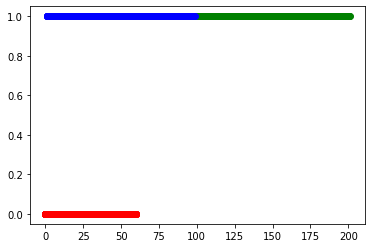

In [188]:
for data in train_data:
    if data[-1] == 0:
        plt.scatter(data[0], data[1], color='r')
    elif data[-1] == 1:
        plt.scatter(data[0], data[1], color='b')
    else:
        plt.scatter(data[0], data[1], color='g')

# Using Sklearn

In [170]:
# Mistura os dados e separa-os em dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    dataset['samples'],
    dataset['targets']
)

# Inicializa um modelo de K-vizinhos mais próximos
knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)


# Avalia o modelo
y_pred = knn.predict(X_test)
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 0.99


# Using Keras

In [191]:
inputs = keras.Input(shape=(2,))
dense = layers.Dense(500, activation="relu")
hidden1 = dense(inputs)
hidden1 = layers.Dense(200, activation="relu")(hidden1)
outputs = layers.Dense(10)(hidden1)


model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
model.summary()

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_3 (Dense)              (None, 500)               1500      
_________________________________________________________________
dense_4 (Dense)              (None, 200)               100200    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2010      
Total params: 103,710
Trainable params: 103,710
Non-trainable params: 0
_________________________________________________________________


In [194]:
y_train = np.array(y_train, dtype='uint8')
y_test = np.array(y_test, dtype='uint8')

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

history = model.fit(np.array(X_train), y_train, batch_size=128, epochs=100, validation_split=0.2)

test_scores = model.evaluate(np.array(X_test), y_test, verbose=2)
print("_"*50)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])



Epoch 1/100
5/5 [==============================] - 0s 17ms/step - loss: 0.5930 - accuracy: 0.8672 - val_loss: 0.3398 - val_accuracy: 0.8456
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0933 - accuracy: 0.9705 - val_loss: 0.0403 - val_accuracy: 1.0000
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0319 - accuracy: 0.9908 - val_loss: 0.2377 - val_accuracy: 0.9044
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 0.2118 - accuracy: 0.9280 - val_loss: 0.0482 - val_accuracy: 0.9779
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0363 - accuracy: 0.9889 - val_loss: 0.0228 - val_accuracy: 1.0000
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0333 - accuracy: 0.9852 - val_loss: 0.2288 - val_accuracy: 0.9191
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1163 - accuracy: 0.9483 - val_loss: 0.0428 - val_accuracy: 0.9853
Epoch 8/100
5/5 [=========

5/5 [==============================] - 0s 5ms/step - loss: 0.1575 - accuracy: 0.9373 - val_loss: 0.0653 - val_accuracy: 0.9779
Epoch 60/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0604 - accuracy: 0.9649 - val_loss: 0.3443 - val_accuracy: 0.8750
Epoch 61/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0915 - accuracy: 0.9686 - val_loss: 0.0404 - val_accuracy: 0.9853
Epoch 62/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0934 - accuracy: 0.9502 - val_loss: 0.0499 - val_accuracy: 1.0000
Epoch 63/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0488 - accuracy: 0.9815 - val_loss: 0.0632 - val_accuracy: 0.9485
Epoch 64/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0746 - accuracy: 0.9668 - val_loss: 0.1608 - val_accuracy: 0.9191
Epoch 65/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0462 - accuracy: 0.9779 - val_loss: 0.0289 - val_accuracy: 1.0000
Epoch 66/100
5/5 [===============

# Using Hancoded perceptron

In [137]:
class Perceptron:
    def __init__(self):
        self.wi = 2
        self.wj = 1

    def receive_input(self, X):
        """
        param X: <list> : Vector containing (xi, xj)
        """
        try:
            xi, xj = X
        except ValueError:
            raise Exception('This neuron accepts a length=2 vector only!')

        return self.process(xi, xj)

    def process(self, xi, xj):
        result = (self.wi * xi) + (self.wj * xj) - 18

        return self.step_function(result)

    def step_function(self, y):
        """
        param y: <float> : equation result
        """
        prediction = 1 if y > 0 else 0

        return self.output(prediction)

    def output(self, value):
        """
        returns the perceptron prediction on the received inputs
        """
        return value

    
perceptron = Perceptron()

In [195]:
# TODO continue